# Hate Speech Detection in Telegram


In [1]:
#Basic Python package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string 
import re

In [2]:
# Load the TSV files
train_file_path = r'C:\Users\BHARGAVI\Downloads\project_data\ghc_train.tsv'
test_file_path = r'C:\Users\BHARGAVI\Downloads\project_data\ghc_test.tsv'
train_df = pd.read_csv(train_file_path, sep='\t')
test_df = pd.read_csv(test_file_path, sep='\t')


# Data Cleaning

In [3]:
#To know are the columns in our dataset
# Columns: Assault on Human Dignity (hd), Calls for Violence (cv), Vulgarity/Offensive Language directed at an individual (vo)
train_df.columns

Index(['text', 'hd', 'cv', 'vo'], dtype='object')

In [4]:
#Top 10 rows in our dataset
train_df.head(10)


,text,hd,cv,vo
0,He most likely converted to islam due to his n...,0,0,0
1,So Ford lied about being a psychologist. Recor...,0,0,0
2,Jobs. Education. Ending abuse of Nation. CA43.,0,0,0
3,"I share a lot of your values, & like many who ...",0,0,0
4,I am so ready to get back to blogging! www.ben...,0,0,0
5,taking a look at new opportunity called FX Pro...,0,0,0
6,Reflecting back when I was in school with Spec...,0,0,0
7,"Let's be honest everyone, last year there were...",0,0,0
8,2007 Nuke plant in Syria,0,0,0
9,NBC's Chuck Todd Thinks He's Figured It All Ou...,0,0,0


In [5]:
#Bottom 10 rows in our dataset
train_df.tail(10)

,text,hd,cv,vo
22026,What does Gab-Pro give ya?,0,0,0
22027,#354 TRUMP POLLS VS MEDIA MELTDOWN! | Jordan P...,0,0,0
22028,The Founders never EVER dealt with a group tha...,0,0,0
22029,Man [homosexually] molests 15-year-old boy on ...,0,0,0
22030,So I saw #Skyscraper for you #GabFam. Now I ha...,0,0,0
22031,"I'm a fan of western civilization, and one bed...",0,0,0
22032,Or ... is she saying that Muslims don't know h...,0,0,0
22033,Thank you to all my followers that follow me e...,0,0,0
22034,Wednesday music. https://www.youtube.com/watch...,0,0,0
22035,This is a really Big Surprise! https://www.wn...,0,0,0


In [6]:
#Describe function to find total count,etc
train_df.describe()

,hd,cv,vo
count,22036.000000,22036.000000,22036.000000
mean,0.084271,0.005945,0.062579
std,0.277800,0.076875,0.242210
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [7]:
#how many nulls 
print(train_df.isnull().sum())

text    0
hd      0
cv      0
vo      0
dtype: int64


In [8]:
#in our case we have no null values as inferred from output 
#how does the data look like
print(train_df.shape)#total rows x column count 
print("\n")
print(train_df.dtypes)# each column data type

(22036, 4)


text    object
hd       int64
cv       int64
vo       int64
dtype: object


# Finding Duplicates

In [9]:
train_df.duplicated().sum()


72

In [10]:
#above output shows our dataset has 72 duplicate values
#now to see which values are duplicate 
duplicate_rows = train_df[train_df.duplicated()]
print(duplicate_rows)

                                                    text  hd  cv  vo
3896                           I see what you did there.   0   0   0
5426                                                Lol!   0   0   0
5661   This is the amount of money necessary to buy t...   0   0   1
6036   Just posted 1st of 3 final 'controversial' (in...   0   0   0
6334                                            Maverick   0   0   0
...                                                  ...  ..  ..  ..
21122  GOD BLESS OUR INCREDIBLE PRESIDENT! RED TIDAL ...   0   0   0
21407                                                  .   0   0   0
21460                                       @Heartiste     0   0   0
21531                   Worst. Strategic. Mistake. EVER.   0   0   0
21976  SARA CARTER: John Kerry Officially Under Inves...   0   0   0

[72 rows x 4 columns]


# Removing Duplicates

In [11]:
# removing the duplicates and keeing just the first occurrence
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()
#again checking for duplicates 
train_df.duplicated().sum()

0

In [12]:
test_df.duplicated().sum()

0

In [13]:
#output 0 above shows that now our dataset has no duplicate values 
#identifying garbage values (garbage values have "object" as their datatype)
for i in train_df.select_dtypes(include="object").columns:
    print(train_df[i].value_counts())
    print("***"*10)

text
'A confidential, 49-page memo for defeating Trump by working with the major social-media platforms to eliminate “right wing propaganda and fake news” was presented in January 2017  by Media Matters founder David Brock at a retreat in Florida with about 100 donors, the Washington Free Beacon reported at the time.' https://www.wnd.com/2018/08/mask-off-social-media-... #FAGS #So...    2
He most likely converted to islam due to his nature being suitable for  islamic doctrine. "Prophet" Muhammad was a psychopath.                                                                                                                                                                                                                                                                   1
The other way around! Just go to Birmingham or London!                                                                                                                                                                       

# Exploratory Data Analysis(EDA)

In [14]:
#descriptive statistics 
train_df.describe().T


,count,mean,std,min,25%,50%,75%,max
hd,21964.0,0.084456,0.278077,0.0,0.0,0.0,0.0,1.0
cv,21964.0,0.005964,0.077000,0.0,0.0,0.0,0.0,1.0
vo,21964.0,0.062693,0.242416,0.0,0.0,0.0,0.0,1.0


In [15]:
train_df.describe(include="object")

,text
count,21964
unique,21963
top,"'A confidential, 49-page memo for defeating Tr..."
freq,2


# Visualization

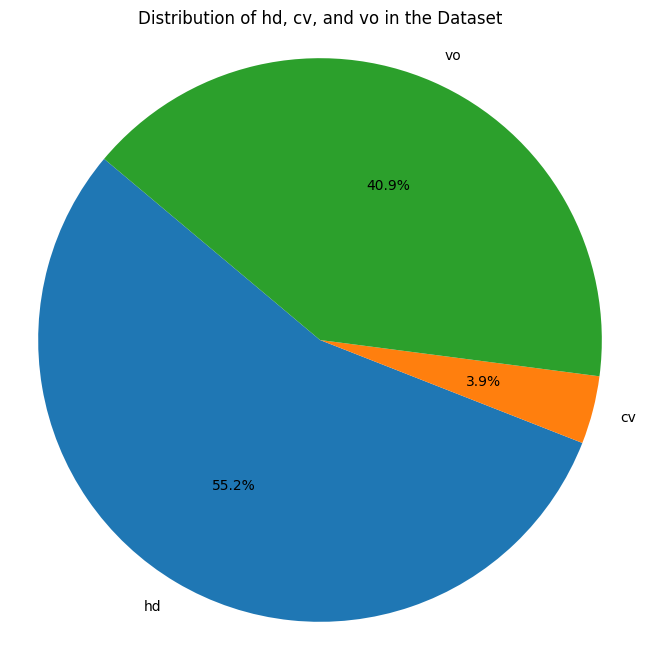

In [16]:
import matplotlib.pyplot as plt

# Sum the values of each column
hd_sum = train_df['hd'].sum()
cv_sum = train_df['cv'].sum()
vo_sum = train_df['vo'].sum()

# Create a list of sums and corresponding labels
sums = [hd_sum, cv_sum, vo_sum]
labels = ['hd', 'cv', 'vo']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sums, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of hd, cv, and vo in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

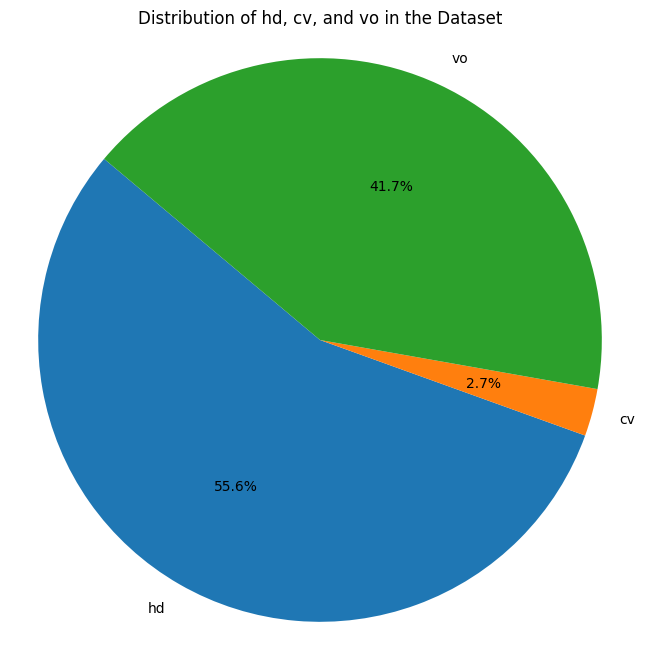

In [17]:
import matplotlib.pyplot as plt

# Sum the values of each column
hd_sum = test_df['hd'].sum()
cv_sum = test_df['cv'].sum()
vo_sum = test_df['vo'].sum()

# Create a list of sums and corresponding labels
sums = [hd_sum, cv_sum, vo_sum]
labels = ['hd', 'cv', 'vo']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sums, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of hd, cv, and vo in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Punctuation Removal

In [18]:
# Remove punctuations and symbols
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', "", string.punctuation))
    return text

# Apply the function to all string cells in the DataFrame
train_df = train_df.map(remove_punctuation)
print(train_df.head)

<bound method NDFrame.head of                                                     text  hd  cv  vo
0      He most likely converted to islam due to his n...   0   0   0
1      So Ford lied about being a psychologist Record...   0   0   0
2             Jobs Education Ending abuse of Nation CA43   0   0   0
3      I share a lot of your values  like many who do...   0   0   0
4      I am so ready to get back to blogging wwwbenbr...   0   0   0
...                                                  ...  ..  ..  ..
22031  Im a fan of western civilization and one bedro...   0   0   0
22032  Or  is she saying that Muslims dont know how t...   0   0   0
22033  Thank you to all my followers that follow me e...   0   0   0
22034  Wednesday music httpswwwyoutubecomwatchvfI2Z1l...   0   0   0
22035  This is a really Big Surprise  httpswwwwndcom2...   0   0   0

[21964 rows x 4 columns]>


# Removing Double Quotes

In [19]:
#removing double quotes
import re

def remove_quotes(text):
    if isinstance(text, str):
        return re.sub(r'[“”]', '', text)
    else:
        return text

train_df = train_df.map(remove_quotes)


In [20]:
train_df['text'][14]

'Suggestion Create another channel not associated with General Shepherd  Post all the INFOWARS stuff but never use the word Alex Jones INFOWARS etc in titles and descriptions Instead use words that describe whats being talked about in the video'

# Stopwords Removal

Stopwords are commonly used words in a language that are often ignored or filtered out in natural language processing tasks beacuase they carry less meaningful information compared to other words



In [21]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#stopwords are commonly used words in a language that are often ignored  or filtered out in natural language processing
#tasks beacuase they carry less meaningful information compared to other words
# Download the necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

# Define a function to remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        return ' '.join([word for word in words if word.lower() not in stop_words])
    return text

# Function to process a chunk
def process_chunk(chunk):
    return chunk.applymap(remove_stopwords)

# Process the train dataset in chunks
train_processed_chunks = []
chunk_size = 21976
for chunk in pd.read_csv(train_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    train_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for train data
train_df_cleaned = pd.concat(train_processed_chunks, ignore_index=True)

# Process the test dataset in chunks
test_processed_chunks = []
for chunk in pd.read_csv(test_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    test_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for test data
test_df_cleaned = pd.concat(test_processed_chunks, ignore_index=True)

# Display a few rows of the cleaned train DataFrame
print("Cleaned Train DataFrame:")
print(train_df_cleaned.head())

# Display a few rows of the cleaned test DataFrame
print("Cleaned Test DataFrame:")
print(test_df_cleaned.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BHARGAVI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BHARGAVI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'did', 'up', 'do', 'your', 'had', 'it', 'is', 'hasn', 'into', "couldn't", 'won', 'that', "you're", 'themselves', "you've", 'who', "hasn't", "mustn't", 'these', "didn't", 'the', 'below', 'am', 't', 'whom', 'has', 'not', 'will', "shouldn't", 'before', 'some', 'other', 'only', 's', 'should', 'by', "weren't", 'an', 'when', 'off', 'own', 'isn', 'during', 'if', 'now', 'where', 'hers', 'them', 'hadn', 'its', 've', 'o', 'over', 'but', "don't", 'here', 'couldn', "it's", 'while', 'against', 'been', "she's", 'their', 'you', 'haven', 'yourself', 'through', 'her', 're', "haven't", 'once', 'because', 'mustn', 'wouldn', 'theirs', 'no', 'nor', 'how', 'which', 'with', 'can', 'my', 'm', 'she', 'itself', 'doesn', "doesn't", 'wasn', 'then', 'in', 'we', 'i', "wouldn't", 'being', 'very', 'a', 'his', "needn't", 'does', 'down', 'more', 'he', "you'd", 'all', 'y', 'ain', 'shouldn', "isn't", "wasn't", 'at', 'to', 'out', 'ma', "shan't", 'of', 'on', 'after', 'himself', 'herself', 'was', 'above', "aren't", 'were',

C:\Users\BHARGAVI\AppData\Local\Temp\ipykernel_20376\3024245986.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return chunk.applymap(remove_stopwords)
C:\Users\BHARGAVI\AppData\Local\Temp\ipykernel_20376\3024245986.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return chunk.applymap(remove_stopwords)
C:\Users\BHARGAVI\AppData\Local\Temp\ipykernel_20376\3024245986.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return chunk.applymap(remove_stopwords)


Cleaned Train DataFrame:
                                                text  hd  cv  vo
0  likely converted islam due nature suitable isl...   0   0   0
1  Ford lied psychologist . Records seem indicate...   0   0   0
2    Jobs . Education . Ending abuse Nation . CA43 .   0   0   0
3  share lot values , & like many , n't call alt ...   0   0   0
4  ready get back blogging ! www.benbrihouse.com ...   0   0   0
Cleaned Test DataFrame:
                                                text  hd  cv  vo
0  https : //www.youtube.com/watch ? v=kACWpKAKta...   0   0   0
1  nice ! tend get tired constant stream ridiculo...   0   0   0
2     Watch today . https : //circumcisionmovie.com/   0   0   0
3  `` Thinking Venues `` First Color Layer blocki...   0   0   0
4  death penalty perpetrators expelling remaining...   0   0   0


# Stemming

Stemming is an NLP technique used to reducce words to their base or root form. 
for eg, the words "running", "runner", and "ran" can all be reduced to the stem "run"


In [22]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

#Stemming is an NLP technique used to reducce words to their base or root form. 
#for eg, the words "running", "runner", and "ran" can all be reduced to the stem "run"

# Initialize the PorterStemmer
stemmer = PorterStemmer()

# Define a function to perform stemming
def stem_text(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        return ' '.join([stemmer.stem(word) for word in words])
    return text

# Function to process a chunk
def process_chunk(chunk):
    return chunk.applymap(stem_text)

# Process the train dataset in chunks
train_processed_chunks = []
chunk_size = 21976  
for chunk in pd.read_csv(train_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    train_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for train data
train_df= pd.concat(train_processed_chunks, ignore_index=True)

# Process the test dataset in chunks
test_processed_chunks = []
for chunk in pd.read_csv(test_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    test_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for test data
test_df = pd.concat(test_processed_chunks, ignore_index=True)

# Display a few rows of the cleaned train DataFrame
print("Cleaned Train DataFrame:")
print(train_df.head())

# Display a few rows of the cleaned test DataFrame
print("Cleaned Test DataFrame:")
print(test_df.head())

C:\Users\BHARGAVI\AppData\Local\Temp\ipykernel_20376\3989439168.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return chunk.applymap(stem_text)
C:\Users\BHARGAVI\AppData\Local\Temp\ipykernel_20376\3989439168.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return chunk.applymap(stem_text)
C:\Users\BHARGAVI\AppData\Local\Temp\ipykernel_20376\3989439168.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return chunk.applymap(stem_text)


Cleaned Train DataFrame:
                                                text  hd  cv  vo
0  he most like convert to islam due to hi natur ...   0   0   0
1  so ford lie about be a psychologist . record s...   0   0   0
2           job . educ . end abus of nation . ca43 .   0   0   0
3  i share a lot of your valu , & like mani who d...   0   0   0
4  i am so readi to get back to blog ! www.benbri...   0   0   0
Cleaned Test DataFrame:
                                                text  hd  cv  vo
0  http : //www.youtube.com/watch ? v=kacwpkaktak...   0   0   0
1  veri nice ! i tend to get tire of the constant...   0   0   0
2      watch today . http : //circumcisionmovie.com/   0   0   0
3  `` think venu `` first color layer block in fi...   0   0   0
4  what about death penalti for perpetr and expel...   0   0   0


# Lemmatization

Lemmatization ia a NLP technique that invloves reducing words to thier base or dictionary form, known as the lemma. Eg-1: words: "running", "ran", "runs" ..... lemma:"run" Eg-2: words: "better" (adjective).....lemma:"good"

In [23]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\BHARGAVI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [24]:
#Lemmitization ia a NLP technique that invloves reducing words to thier base or dictionary form, known as the lemma. 
#eg: words: "running", "ran", "runs" ..... lemma:"run"
#eg: words: "better" (adjective).....lemma:"good"


import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download the necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to perform lemmatization
def lemmatize_text(text):
    if isinstance(text, str):
        words = word_tokenize(text)
        return ' '.join([lemmatizer.lemmatize(word) for word in words])
    return text

# Function to process a chunk
def process_chunk(chunk):
    return chunk.applymap(lemmatize_text)

# Process the train dataset in chunks
train_processed_chunks = []
chunk_size = 21976
for chunk in pd.read_csv(train_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    train_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for train data
train_df_cleaned = pd.concat(train_processed_chunks, ignore_index=True)

# Process the test dataset in chunks
test_processed_chunks = []
for chunk in pd.read_csv(test_file_path, sep='\t', chunksize=chunk_size):
    processed_chunk = process_chunk(chunk)
    test_processed_chunks.append(processed_chunk)

# Concatenate all processed chunks into a single DataFrame for test data
test_df_cleaned = pd.concat(test_processed_chunks, ignore_index=True)

# Display a few rows of the cleaned train DataFrame
print("Cleaned Train DataFrame:")
print(train_df_cleaned.head())

# Display a few rows of the cleaned test DataFrame
print("Cleaned Test DataFrame:")
print(test_df_cleaned.head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BHARGAVI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BHARGAVI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\BHARGAVI\AppData\Local\Temp\ipykernel_20376\858550214.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return chunk.applymap(lemmatize_text)
C:\Users\BHARGAVI\AppData\Local\Temp\ipykernel_20376\858550214.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return chunk.applymap(lemmatize_text)
C:\Users\BHARGAVI\AppData\Local\Temp\ipykernel_20376\858550214.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return chunk.applymap(lemmatize_text)


Cleaned Train DataFrame:
                                                text  hd  cv  vo
0  He most likely converted to islam due to his n...   0   0   0
1  So Ford lied about being a psychologist . Reco...   0   0   0
2  Jobs . Education . Ending abuse of Nation . CA...   0   0   0
3  I share a lot of your value , & like many who ...   0   0   0
4  I am so ready to get back to blogging ! www.be...   0   0   0
Cleaned Test DataFrame:
                                                text  hd  cv  vo
0  http : //www.youtube.com/watch ? v=kACWpKAKtak...   0   0   0
1  Very nice ! I tend to get tired of the constan...   0   0   0
2      Watch today . http : //circumcisionmovie.com/   0   0   0
3  `` Thinking Venues `` First Color Layer blocki...   0   0   0
4  What about death penalty for perpetrator and e...   0   0   0


In [25]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

train_file_path = r'C:\Users\BHARGAVI\Downloads\project_data\ghc_train.tsv'
test_file_path = r'C:\Users\BHARGAVI\Downloads\project_data\ghc_test.tsv'
train_df = pd.read_csv(train_file_path, sep='\t')
test_df = pd.read_csv(test_file_path, sep='\t')
# Combine train and test datasets
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Define a function to preprocess the text
def preprocess_text(text):
    if isinstance(text, str):
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Tokenize the text
        words = word_tokenize(text)
        # Remove stopwords and convert to lowercase
        words = [word.lower() for word in words if word.lower() not in stop_words]
        return words
    return []

# Apply preprocessing to the text column (assuming text column is named 'text')
combined_df['cleaned_text'] = combined_df['text'].apply(preprocess_text)

# Flatten the list of words
all_words = [word for words in combined_df['cleaned_text'] for word in words]

# Calculate word frequencies
word_freq = Counter(all_words)

# Display the most common words
common_words = word_freq.most_common(100)  # Adjust the number as needed
print(common_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BHARGAVI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BHARGAVI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('’', 2117), ('like', 1832), ('people', 1743), ('one', 1485), ('get', 1367), ('dont', 1358), ('trump', 1319), ('would', 1290), ('us', 1130), ('know', 1074), ('im', 989), ('time', 989), ('good', 986), ('think', 901), ('see', 882), ('right', 807), ('new', 800), ('want', 766), ('white', 756), ('go', 720), ('need', 706), ('even', 702), ('gab', 698), ('back', 697), ('going', 684), ('make', 673), ('never', 670), ('well', 650), ('way', 621), ('still', 581), ('really', 580), ('take', 575), ('”', 572), ('got', 568), ('“', 561), ('much', 556), ('say', 553), ('day', 545), ('twitter', 532), ('great', 531), ('world', 519), ('many', 511), ('cant', 495), ('could', 494), ('thats', 493), ('free', 488), ('shit', 471), ('jews', 466), ('first', 465), ('years', 461), ('man', 459), ('left', 458), ('also', 454), ('god', 453), ('thing', 446), ('love', 441), ('look', 436), ('news', 432), ('said', 425), ('america', 424), ('every', 422), ('today', 421), ('another', 418), ('president', 414), ('country', 412), ('

In [26]:
# Creating DataFrame
df = train_df

# Adding 'label' column
df['label'] = ((df['hd'] == 1) | (df['cv'] == 1) | (df['vo'] == 1)).astype(int)

print(df['label'][29])

1


# URL Removal, Hastags and Mentions


In [27]:
# removing urls,hastags and mentions
def remove_urls_mentions_hashtags(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\@\w+|\#', '', text)
    return text

test_df['text'] = test_df['text'].apply(remove_urls_mentions_hashtags)
train_df['text'] = train_df['text'].apply(remove_urls_mentions_hashtags)
def remove_url(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

train_df['text'] = train_df['text'].apply(remove_url)
test_df['text'] = test_df['text'].apply(remove_url)
test_df.head()

,text,hd,cv,vo
0,A talk on natural law.,0,0,0
1,Very nice! I tend to get tired of the constant...,0,0,0
2,Watch today.,0,0,0
3,""" Thinking Venues "" First Color Layer blocking...",0,0,0
4,What about death penalty for perpetrators and...,0,0,0


In [28]:
# Function to check for URLs
def contains_url(text):
    url_pattern = re.compile(r'http\S+|www\S+|https\S+')
    return bool(url_pattern.search(text))
# Apply the function to the text column
test_df['contains_url'] = test_df['text'].apply(contains_url)

# Filter rows that contain URLs
rows_with_urls = test_df[test_df['contains_url']]

print("Rows with URLs:")
print(rows_with_urls)

Rows with URLs:
Empty DataFrame
Columns: [text, hd, cv, vo, contains_url]
Index: []


In [29]:
test_df.head(10)

,text,hd,cv,vo,contains_url
0,A talk on natural law.,0,0,0,False
1,Very nice! I tend to get tired of the constant...,0,0,0,False
2,Watch today.,0,0,0,False
3,""" Thinking Venues "" First Color Layer blocking...",0,0,0,False
4,What about death penalty for perpetrators and...,0,0,0,False
5,You have insecurities? Fuck you,0,0,0,False
6,Powerful Truths About Donald Trump the Media D...,0,0,0,False
7,Just saw an Oreo cookie commercial. Drool.,0,0,0,False
8,I bet a neural net with half a dozen nodes co...,0,0,0,False
9,"Country by country, the 'Prague Spring' that w...",0,0,0,False


# Emoji Removal

In [30]:
#emoji removal
import pandas as pd
import emoji

# Load dataset from CSV file
#df = pd.read_csv('your_dataset.csv')

# Define a function to replace emoji codes with descriptive text
def replace_emojis(text):
    return emoji.demojize(text)

# Replace emoji codes in a specific column (e.g., 'text_column')
train_df['text'] = train_df['text'].apply(replace_emojis)
test_df['text'] = test_df['text'].apply(replace_emojis)

# Save the updated dataset to a new CSV file
#df.to_csv('updated_dataset.csv', index=False)
train_df.head(10)

,text,hd,cv,vo,label
0,He most likely converted to islam due to his n...,0,0,0,0
1,So Ford lied about being a psychologist. Recor...,0,0,0,0
2,Jobs. Education. Ending abuse of Nation. CA43.,0,0,0,0
3,"I share a lot of your values, & like many who ...",0,0,0,0
4,I am so ready to get back to blogging! recipe...,0,0,0,0
5,taking a look at new opportunity called FX Pro...,0,0,0,0
6,Reflecting back when I was in school with Spec...,0,0,0,0
7,"Let's be honest everyone, last year there were...",0,0,0,0
8,2007 Nuke plant in Syria,0,0,0,0
9,NBC's Chuck Todd Thinks He's Figured It All Ou...,0,0,0,0


In [31]:
specific_text = train_df.loc[9, 'text']
print(specific_text) 

NBC's Chuck Todd Thinks He's Figured It All Out :grinning_squinting_face: 


In [32]:
specific_text = test_df.loc[16, 'text']
print(specific_text) 

:trophy: Precious Metals: 


In [33]:
train_df['text'] = train_df['text'].str.replace('_', '  ', regex=True) 
specific_text = train_df.loc[9, 'text']
print(specific_text) 

NBC's Chuck Todd Thinks He's Figured It All Out :grinning  squinting  face: 


# Abbreviation Treatment

In [34]:
import pandas as pd
chat_words = {
    'AFAIK': 'As Far As I Know',
    'CA43': 'Californias 43rd congressional district',
    'FX': 'Foreign Exchange',
    'A.D.D': 'Attention Deficit Disorder',
    'NBC': 'National Broadcasting Company',
    'FB': 'Facebook',          
    'AFK': 'Away From Keyboard',
    'ASAP': 'As Soon As Possible',         
    'ATK': 'At The Keyboard',
    'ATM': 'At The Moment',
    'A3': 'Anytime, Anywhere, Anyplace',
    'BAK': 'Back At Keyboard',
    'BBL': 'Be Back Later',
    'BBS': 'Be Back Soon',
    'BFN': 'Bye For Now',
    'B4N': 'Bye For Now',
    'BRB': 'Be Right Back',
    'BRT': 'Be Right There',
    'BTW': 'By The Way',
    'B4': 'Before',
    'CU': 'See You',
    'CUL8R': 'See You Later',
    'CYA': 'See You',
    'FAQ': 'Frequently Asked Questions',
    'FC': 'Fingers Crossed',
    'FWIW': 'For What Its Worth',
    'FYI': 'For Your Information',
    'GAL': 'Get A Life',
    'GG': 'Good Game',
    'GN': 'Good Night',
    'GMTA': 'Great Minds Think Alike',
    'GR8': 'Great!',
    'G9': 'Genius',
    'IC': 'I See',
    'ICQ': 'I Seek you (also a chat program)',
    'ILU': 'I Love You',
    'IMHO': 'In My Honest/Humble Opinion',
    'IMO': 'In My Opinion',
    'IOW': 'In Other Words',
    'IRL': 'In Real Life',
    'KISS': 'Keep It Simple, Stupid',
    'LDR': 'Long Distance Relationship',
    'LMAO': 'Laugh My A.. Off',
    'LOL': 'Laughing Out Loud',
    'LTNS': 'Long Time No See',
    'L8R': 'Later',
    'MTE': 'My Thoughts Exactly',
    'M8': 'Mate',
    'NRN': 'No Reply Necessary',
    'OIC': 'Oh I See',
    'PITA': 'Pain In The A..',
    'PRT': 'Party',
    'PRW': 'Parents Are Watching',
    'QPSA': 'Que Pasa?',
    'ROFL': 'Rolling On The Floor Laughing',
    'ROFLOL': 'Rolling On The Floor Laughing Out Loud',
    'ROTFLMAO': 'Rolling On The Floor Laughing My A.. Off',
    'SK8': 'Skate',
    'STATS': 'Your sex and age',
    'ASL': 'Age, Sex, Location',
    'THX': 'Thank You',
    'TTFN': 'Ta-Ta For Now!',
    'TTYL': 'Talk To You Later',
    'U': 'You',
    'U2': 'You Too',
    'U4E': 'Yours For Ever',
    'WB': 'Welcome Back',
    'WTF': 'What The Fuck',
    'WTG': 'Way To Go!',
    'WUF': 'Where Are You From?',
    'W8': 'Wait...',
    '7K': 'Sick'
}

# Function to replace chat words in text
def replace_chat_words(text):
    for word, full_form in chat_words.items():
        text = text.replace(word, full_form)
    return text

# Applying the function to the 'text' column of the DataFrame
train_df['text'] = train_df['text'].apply(replace_chat_words)

# Display the updated DataFrame
print(train_df)

                                                    text  hd  cv  vo  label
0      He most likely converted to islam due to his n...   0   0   0      0
1      So Ford lied about being a psychologist. Recor...   0   0   0      0
2      Jobs. Education. Ending abuse of Nation. Calif...   0   0   0      0
3      I share a lot of your values, & like many who ...   0   0   0      0
4      I am so ready to get back to blogging!  recipe...   0   0   0      0
...                                                  ...  ..  ..  ..    ...
22031  I'm a fan of western civilization, and one bed...   0   0   0      0
22032  Or ... is she saying that Muslims don't know h...   0   0   0      0
22033  Thank you to all my followers that follow me e...   0   0   0      0
22034                                  Wednesday music.    0   0   0      0
22035                   This is a really Big Surprise!     0   0   0      0

[22036 rows x 5 columns]


# Lowercasing

In [35]:
train_df['text']=train_df['text'].str.lower()
train_df.tail()


,text,hd,cv,vo,label
22031,"i'm a fan of western civilization, and one bed...",0,0,0,0
22032,or ... is she saying that muslims don't know h...,0,0,0,0
22033,thank you to all my followers that follow me e...,0,0,0,0
22034,wednesday music.,0,0,0,0
22035,this is a really big surprise!,0,0,0,0


In [36]:
import pandas as pd
import numpy as np

train_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
null_counts = train_df.isnull().sum()

print(null_counts)

text     260
hd         0
cv         0
vo         0
label      0
dtype: int64


In [37]:
train_df = train_df.dropna().loc[(train_df['text'] != '[deleted]') & (train_df['text'] != '[removed]')]
# Remove punctuations and symbols
def remove_punctuation_and_special_chars(text):
    if isinstance(text, str):
        # Remove punctuations
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Remove specific unwanted characters
        special_chars = ['Â', 'â€Â', 'â€™']
        for char in special_chars:
            text = text.replace(char, '')
    return text

# Apply the function to all string cells in the DataFrame
train_df = train_df.applymap( remove_punctuation_and_special_chars)
print(train_df.head)

<bound method NDFrame.head of                                                     text  hd  cv  vo  label
0      he most likely converted to islam due to his n...   0   0   0      0
1      so ford lied about being a psychologist record...   0   0   0      0
2      jobs education ending abuse of nation californ...   0   0   0      0
3      i share a lot of your values  like many who do...   0   0   0      0
4      i am so ready to get back to blogging  recipes...   0   0   0      0
...                                                  ...  ..  ..  ..    ...
22031  im a fan of western civilization and one bedro...   0   0   0      0
22032  or  is she saying that muslims dont know how t...   0   0   0      0
22033  thank you to all my followers that follow me e...   0   0   0      0
22034                                   wednesday music    0   0   0      0
22035                    this is a really big surprise     0   0   0      0

[21776 rows x 5 columns]>


C:\Users\BHARGAVI\AppData\Local\Temp\ipykernel_20376\4030388125.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_df = train_df.applymap( remove_punctuation_and_special_chars)


In [38]:
cleaned_train_file_path = r'C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv'
cleaned_test_file_path = r'C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv'

train_df.to_csv(cleaned_train_file_path, sep=',', index=False)
test_df.to_csv(cleaned_test_file_path, sep=',', index=False)


# Tokenization

Tokenization is the process of breaking down a text or a sequence of characters into smaller units called tokens. These tokens can be words, phrases, symbols, or other meaningful elements depending on the context and the task at hand. Tokenization is a fundamental step in natural language processing (NLP) and text mining.



In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Load the TSV files
train_file_path = r'C:\Users\BHARGAVI\Downloads\project_data\ghc_train.tsv'
test_file_path = r'C:\Users\BHARGAVI\Downloads\project_data\ghc_test.tsv'
train_data = pd.read_csv(train_file_path, sep='\t')
test_data = pd.read_csv(test_file_path, sep='\t')

# Whitespace Tokenization

Whitespace tokenization is a straightforward method of tokenization where text is segmented into tokens based on whitespace characters such as spaces, tabs, and line breaks.



In [41]:
#whitespacetokenisation
from nltk.tokenize import WhitespaceTokenizer

# Initialize the whitespace tokenizer
whitespace_tokenizer = WhitespaceTokenizer()
def  whitespace_tokenize(text):
    return whitespace_tokenizer.tokenize(text)
train_data['tokens'] = train_data['text'].apply(whitespace_tokenize)
train_data.head()

,text,hd,cv,vo,tokens
0,He most likely converted to islam due to his n...,0,0,0,"[He, most, likely, converted, to, islam, due, ..."
1,So Ford lied about being a psychologist. Recor...,0,0,0,"[So, Ford, lied, about, being, a, psychologist..."
2,Jobs. Education. Ending abuse of Nation. CA43.,0,0,0,"[Jobs., Education., Ending, abuse, of, Nation...."
3,"I share a lot of your values, & like many who ...",0,0,0,"[I, share, a, lot, of, your, values,, &, like,..."
4,I am so ready to get back to blogging! www.ben...,0,0,0,"[I, am, so, ready, to, get, back, to, blogging..."


# Finalized Embedding Technique - TFIDF

TF-IDF (Term Frequency-Inverse Document Frequency) is a technique used to represent the importance of a word in a document relative to a collection of documents. It is commonly used in information retrieval and text mining tasks. While TF-IDF is primarily used for feature extraction and weighting in traditional machine learning models, it can also be considered as a form of embedding in the context of text representation.



In [42]:
# File paths
train_file = r'C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv'
test_file = r'C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv'
# Load CSV files into pandas DataFrames
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

train_df.dropna(subset=['text'], inplace=True)



def tfidf_embedding(text):
    vectorizer = TfidfVectorizer(max_features=5000)
    embeddings = vectorizer.fit_transform(text)
    return embeddings

text = train_df['text'].values
embeddings_tfidf = tfidf_embedding(text)
print(embeddings_tfidf)

  (0, 2065)	0.17896439019209595
  (0, 2879)	0.22706098159854587
  (0, 2606)	0.3060527671205744
  (0, 4503)	0.1829744825004118
  (0, 2342)	0.2700247838534396
  (0, 1400)	0.29776582983772887
  (0, 2126)	0.1888513225346217
  (0, 2951)	0.3260085198783877
  (0, 492)	0.2114028470497365
  (0, 1773)	0.12407978854649925
  (0, 2343)	0.31046416877256344
  (0, 1332)	0.3892391747212451
  (0, 2905)	0.3892391747212451
  (0, 4785)	0.16202969408825163
  (1, 4503)	0.09912988324438424
  (1, 492)	0.22906297380044385
  (1, 4785)	0.17556529672989274
  (1, 4078)	0.18314192526077977
  (1, 1779)	0.35822709339486697
  (1, 2596)	0.38347050536924204
  (1, 89)	0.1845526087907791
  (1, 3598)	0.37005656618250765
  (1, 3892)	0.3286760103770535
  (1, 3958)	0.23702459173372586
  (1, 2420)	0.18222373574691075
  :	:
  (21769, 2217)	0.09507413429294405
  (21769, 230)	0.13865645964597748
  (21769, 1760)	0.17639169516315656
  (21769, 1055)	0.1395559001832773
  (21769, 496)	0.14436409246709905
  (21769, 2348)	0.1489166494675

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Step 1: TF-IDF Encoding
def tfidf_embedding(text):
    vectorizer = TfidfVectorizer(max_features=6000)
    embeddings = vectorizer.fit_transform(text)
    return embeddings

text = train_df['text'].values
label = train_df['hd'].values

embeddings_tfidf = tfidf_embedding(text)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings_tfidf, label, test_size=0.2, random_state=42)

# Step 3: Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Predictions and Evaluation
y_pred = rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9130
Precision: 0.9109
Recall: 0.9130
F1 Score: 0.8769


ADVANTAGES: 1.High Accuracy, 2.Dimensionality Reduction, 3.Semantic Representation, 4.Contextual Information, 5.Natural Language Understanding, 6.Efficient Computation.

# Random OverSampling

Random oversampling is a technique used in imbalanced classification problems to address the issue where one class (minority class) is underrepresented compared to another class (majority class). In such cases, traditional machine learning models might be biased towards the majority class, leading to poor performance on predicting the minority class.



In [44]:
# File paths
train_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv"
test_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv"

# Load CSV files into pandas DataFrames
df = pd.read_csv(train_file)
df['label'].value_counts()

label
0    19126
1     2650
Name: count, dtype: int64

In [45]:
#class count
count_class_0,count_class_1=df.label.value_counts()
df_class_0=df[df['label']==0]
df_class_1=df[df['label']==1]
df_class_0.shape

(19126, 5)

In [46]:
df_class_1.shape

(2650, 5)

In [47]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)
df_test_over.shape


(38252, 5)

In [48]:
print('Random over Sampling:')
print(df_test_over.label.value_counts())

Random over Sampling:
label
0    19126
1    19126
Name: count, dtype: int64


Random over sampling:
label
0    19126
1    19126
Name: count, dtype: int64


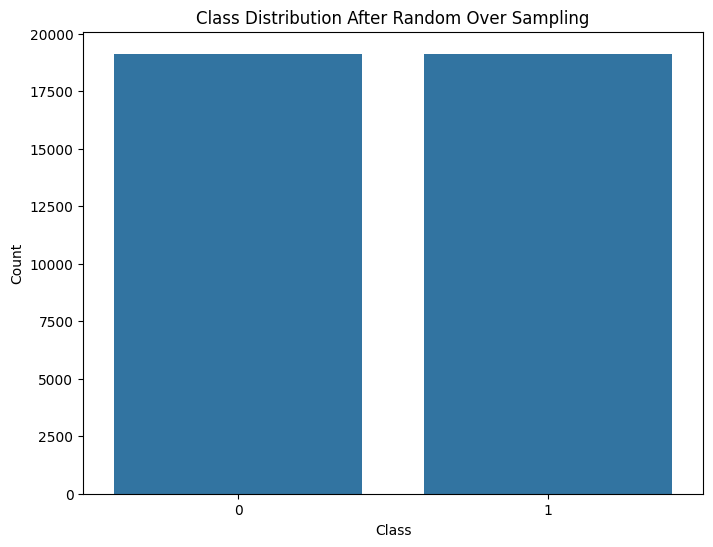

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Print the value counts of the 'hd' column in df_test_under
print('Random over sampling:')
print(df_test_over['label'].value_counts())

# Plot the distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df_test_over)
plt.title('Class Distribution After Random Over Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Finalized Machine Learning Model - Gradient Boosting

Gradient boosting is a powerful machine learning technique used for both regression and classification tasks. It belongs to the class of ensemble methods, which combine predictions from multiple individual models (often decision trees, in the case of gradient boosting) to produce a single, more accurate prediction.



In [50]:
import pandas as pd
# File paths
train_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_train.csv"
test_file = r"C:\Users\BHARGAVI\Downloads\project_data\ghc_test.csv"

# Load CSV files into pandas DataFrames
train_df = pd.read_csv(train_file)

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

#Drop rows with NaN in 'text' column
train_df = train_df.dropna(subset=['text'])

# Step 2: Split the data into X (features) and y (labels)
X = train_df['text']
y = train_df['label']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# Initialize TfidfVectorizer with adjusted parameters
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit and transform X_train (text data) using TfidfVectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform X_test using the fitted TfidfVectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Balance the training data 
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled= ros.fit_resample(X_train_tfidf, y_train)


# Hypertuning of Gradient Boosting


In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

def train_best_gradient_boosting(X_resampled, y_resampled):
    # Define the parameter grid for Gradient Boosting
    param_grid = {
        'n_estimators': [100],
        'learning_rate': [0.1, 0.5],
        'max_depth': [3, 5]
    }
    
    # Create a Gradient Boosting model
    model = GradientBoostingClassifier()
    
    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_resampled, y_resampled)
    
    # Get the best Gradient Boosting model
    best_model = grid_search.best_estimator_
    
    return best_model

# Example usage
best_gradient_boosting_model = train_best_gradient_boosting(X_resampled, y_resampled)


In [54]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

def predict_and_evaluate_gradient_boosting(best_gradient_boosting_model, X_test_tfidf, y_test):
    results = {}
    
    # Predict using the Gradient Boosting model
    y_pred = best_gradient_boosting_model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results['GradientBoosting'] = {
        'accuracy': accuracy,
        'recall': recall,
        'confusion_matrix': cm
    }
    
    return results

def print_gradient_boosting_results(results):
    for name, metrics in results.items():
        accuracy = metrics['accuracy']
        recall = metrics['recall']
        cm = metrics['confusion_matrix']
        
        print(f'===== Results for {name} =====')
        print(f'Accuracy: {accuracy:.3f}')
        print(f'Recall: {recall:.3f}')
        print('Confusion Matrix:')
        print(cm)
        print('\n')

# Example usage
gradient_boosting_results = predict_and_evaluate_gradient_boosting(best_gradient_boosting_model, X_test_tfidf, y_test)
print_gradient_boosting_results(gradient_boosting_results)


===== Results for GradientBoosting =====
Accuracy: 0.855
Recall: 0.566
Confusion Matrix:
[[3423  402]
 [ 230  300]]




Conclusion Gradient Boosting with 85% of accuracy is Performing best compare to all other different Models. There are models such as Random forest and SVM that have greater accuracy as well as GB but they are unable to classify the minority class at all,they are biased toward majority class.



# Finalized Deep Learning Model - BERT with LSTM

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
from transformers import BertTokenizer, BertModel
import torch

In [ ]:
# Reading the CSV file into a pandas DataFrame
df = pd.read_csv("/content/ghc_train.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Filling any missing values in the 'text' column with an empty string
df['text'] = df['text'].fillna('')

y = df['label']
X=df['text']
# Splitting the dataset into training and testing sets
# Using 20% of the data for testing and 80% for training
# Stratifying the split based on the labels to ensure balanced classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import BertTokenizer, TFBertModel

# Initializing the BERT tokenizer with a pre-trained 'bert-base-uncased' model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Initializing the BERT model with a pre-trained 'bert-base-uncased' model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Function to encode text data using a BERT tokenizer
def encode_texts(texts, tokenizer, max_length=100):
    encodings = tokenizer(
        texts.tolist(),
        truncation=True,
        padding='max_length',
        max_length=max_length,
        return_tensors='tf'
    )
    return encodings

# Encoding the training and testing text data with a reduced maximum length of 50
X_train_encodings = encode_texts(X_train, tokenizer, max_length=50)  # Reduced max_length
X_test_encodings = encode_texts(X_test, tokenizer, max_length=50)

# Function to get BERT embeddings from encoded text data
def get_bert_embeddings(encodings, bert_model):
    outputs = bert_model(encodings['input_ids'], attention_mask=encodings['attention_mask'])
    return outputs.last_hidden_state

# Setting the batch size for processing
batch_size = 16

In [ ]:
# List to store BERT embeddings for the training data
X_train_embeddings = []

# Process the training data in batches to get BERT embeddings
for i in range(0, len(X_train_encodings['input_ids']), batch_size):
    batch_encodings = {key: val[i:i+batch_size] for key, val in X_train_encodings.items()}  # Get a batch of encodings
    batch_embeddings = get_bert_embeddings(batch_encodings, bert_model) # Get BERT embeddings for the batch
    X_train_embeddings.append(batch_embeddings) # Append the batch embeddings to the list

# Concatenate all the batch embeddings into a single tensor
X_train_embeddings = tf.concat(X_train_embeddings, axis=0)

# List to store BERT embeddings for the testing data
X_test_embeddings = []

# Process the testing data in batches to get BERT embeddings
for i in range(0, len(X_test_encodings['input_ids']), batch_size):
    batch_encodings = {key: val[i:i+batch_size] for key, val in X_test_encodings.items()}
    batch_embeddings = get_bert_embeddings(batch_encodings, bert_model)
    X_test_embeddings.append(batch_embeddings)

# Concatenate all the batch embeddings into a single tensor
X_test_embeddings = tf.concat(X_test_embeddings, axis=0)

# Compute class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Convert class weights to a dictionary format required by TensorFlow
class_weights_dict = dict(enumerate(class_weights))


Epoch 1/5
1102/1102 [==============================] - 443s 390ms/step - loss: 0.5381 - accuracy: 0.7320 - val_loss: 0.4959 - val_accuracy: 0.7947
Epoch 2/5
1102/1102 [==============================] - 424s 385ms/step - loss: 0.4686 - accuracy: 0.7822 - val_loss: 0.3700 - val_accuracy: 0.8142
Epoch 3/5
1102/1102 [==============================] - 426s 386ms/step - loss: 0.4434 - accuracy: 0.7869 - val_loss: 0.4812 - val_accuracy: 0.7661
Epoch 4/5
1102/1102 [==============================] - 426s 386ms/step - loss: 0.4171 - accuracy: 0.8071 - val_loss: 0.4239 - val_accuracy: 0.8169
Epoch 5/5
1102/1102 [==============================] - 427s 388ms/step - loss: 0.3905 - accuracy: 0.8200 - val_loss: 0.3814 - val_accuracy: 0.8373
138/138 - 7s - loss: 0.3700 - accuracy: 0.8142 - 7s/epoch - 48ms/step

Test accuracy: 0.8142014741897583
138/138 [==============================] - 8s 51ms/step


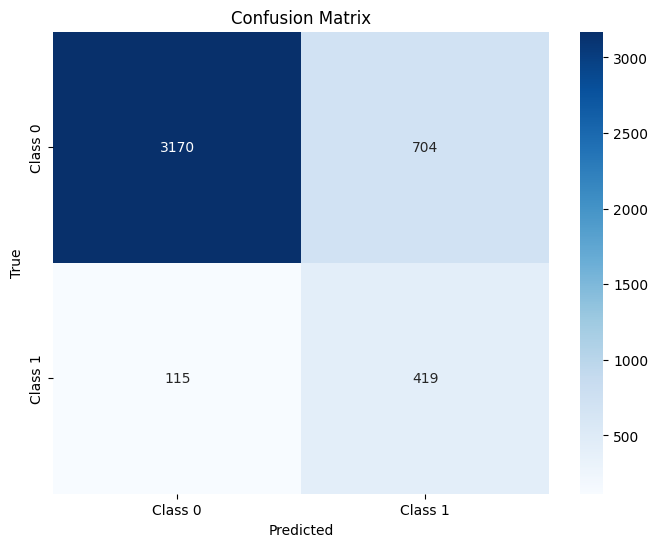

              precision    recall  f1-score   support

     Class 0       0.96      0.82      0.89      3874
     Class 1       0.37      0.78      0.51       534

    accuracy                           0.81      4408
   macro avg       0.67      0.80      0.70      4408
weighted avg       0.89      0.81      0.84      4408



In [ ]:
# Define the model
model = Sequential()

# Adding a bidirectional LSTM layer with 256 units, returning sequences, and specifying the input shape
model.add(Bidirectional(LSTM(units=256, return_sequences=True, input_shape=(X_train_embeddings.shape[1], X_train_embeddings.shape[2]))))

# Adding a dropout layer with a rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))

# Adding another bidirectional LSTM layer with 64 units, returning sequences
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))

# Adding a dropout layer with a rate of 0.3 to prevent overfitting
model.add(Dropout(0.3))

# Adding another bidirectional LSTM layer with 64 units, not returning sequences
model.add(Bidirectional(LSTM(units=64)))
model.add(Dropout(0.2))

# Adding a dense layer with 64 units and ReLU activation function
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Adding the final dense layer with 1 unit and sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with early stopping and class weights
history = model.fit(X_train_embeddings, y_train, epochs=5, batch_size=batch_size,
                    validation_data=(X_test_embeddings, y_test),
                    class_weight=class_weights_dict,
                    callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_embeddings, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Predict the labels for the test set
y_pred = model.predict(X_test_embeddings)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1']))

In [ ]:
# Importing various evaluation metrics from scikit-learn
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc

accuracy = accuracy_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
roc_auc = roc_auc_score(y_test, y_pred)

# Printing the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Accuracy: 0.8142014519056261
Recall: 0.7846441947565543
Precision: 0.37310774710596617
F1 Score: 0.5057332528666264
ROC AUC Score: 0.8777224616622099


Among all other dl models, the BERT with LSTM model is giving the best result with a good accuracy and a notable recall of 78%.The metric that iam considering is recall(i.e. Recall measures the proportion of true positive instances correctly identified by the model among all actual positive instances.)
As there is an improvement in the metric that Iam considering that is Recall which is improved from 56% to 78% and The ROC AUC Score was also showing betterment than the finalized benchmark of the Machine Learning Model. Based on these, I Finalized BERT with LSTM model.